In [52]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os


In [53]:

def load_data():
    df = pd.read_csv("hospitality-ai-platform/data/revenue_summary.csv", parse_dates=["date"])
    df = df[["date", "occupancy"]].rename(columns={"date": "ds", "occupancy": "y"})
    return df



In [54]:
df=load_data()
df.head()

ds     y
0 2022-01-01  0.79
1 2022-01-02  0.75
2 2022-01-03  0.86
3 2022-01-04  0.62
4 2022-01-05  0.58

In [55]:
def train_model(df):
    model = Prophet(weekly_seasonality=True)
    model.fit(df)
    return model



In [56]:
model=train_model(df)

00:10:50 - cmdstanpy - INFO - Chain [1] start processing
00:10:50 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
def forecast_occupancy(model, periods=90):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast



In [58]:
forecast=forecast_occupancy(model, periods=90)

In [59]:
def plot_forecast(model, forecast):
    fig = model.plot(forecast)
    plt.title("Occupancy Forecast")
    plt.tight_layout()
    os.makedirs("outputs", exist_ok=True)
    plt.savefig("outputs/occupancy_forecast.png")
    plt.show()


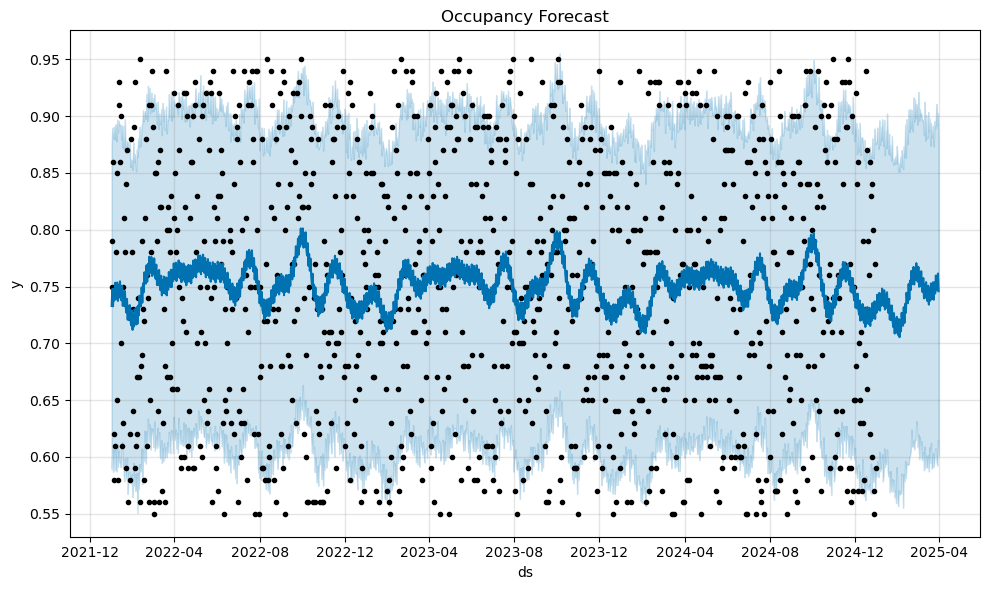

In [60]:
forecast_plot=plot_forecast(model, forecast)

In [61]:

def save_forecast(forecast):
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("outputs/occupancy_forecast.csv", index=False)



In [62]:
forecast=save_forecast(forecast)

In [63]:
def main():
    df = load_data()
    model = train_model(df)
    forecast = forecast_occupancy(model)
    plot_forecast(model, forecast)
    save_forecast(forecast)
    print("✅ Occupancy Forecast complete.")


00:10:52 - cmdstanpy - INFO - Chain [1] start processing
00:10:52 - cmdstanpy - INFO - Chain [1] done processing


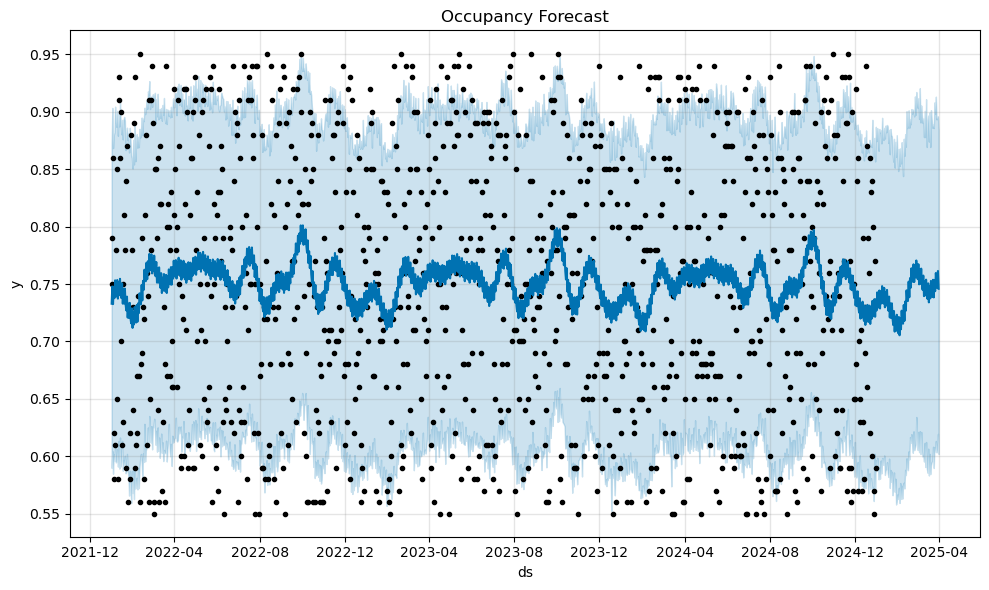

✅ Occupancy Forecast complete.


In [64]:

if __name__ == "__main__":
    main()